In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Numpy for the numerical operations
# pandas for the data manipulation and analysis
# matplotlib and seaborn for the data visualization

In [3]:
df=pd.read_csv("Zomato-data-.csv")

In [4]:
# the first 10 rows for each column
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [5]:
#the last 10 rows for each column
df.tail(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
138,Sri Murari Family Restaurant,No,No,2.9/5,0,250,Dining
139,Aramane Donne Biriyani,No,No,2.9/5,0,150,Dining
140,Darkolates,No,No,3.3/5,0,200,Dining
141,Swaada Healthy Kitchen,No,No,3.3/5,0,350,Dining
142,Gawdaru Mane Beriyani,No,No,3.3/5,0,300,Dining
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [6]:
# Creating a function to convert the value of the rate column into a single value
# (4.1/5) - 4.1

def HandleRate(value):
    value=str(value).split("/")
    value=float(value[0])
    return value

In [7]:
df["rate"]=df["rate"].apply(HandleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 0, 'Type of restaurant')

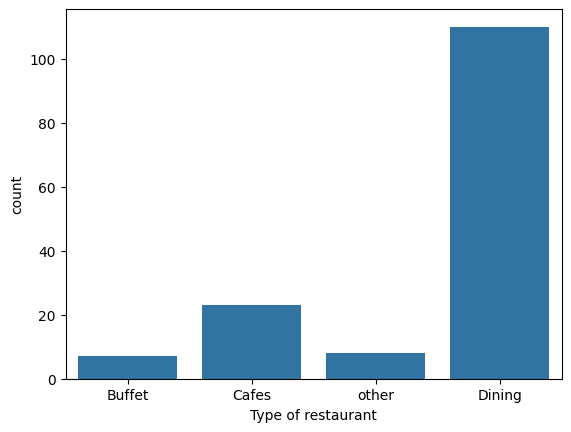

In [16]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of restaurant")

In [17]:
# Majority of the customers order from the Dining type of restaurant

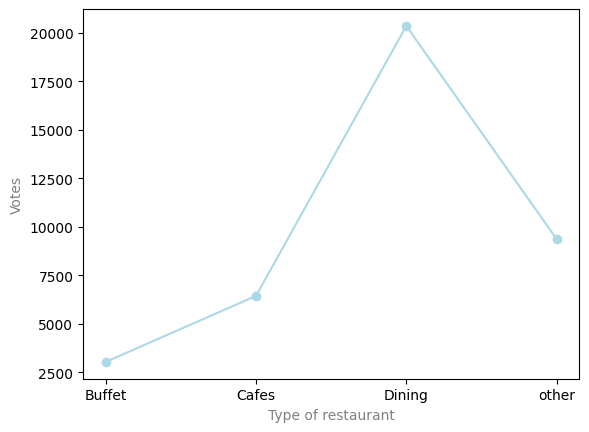

In [33]:
group_data=df.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":group_data})
plt.plot(result, c="lightblue", marker="o")
plt.xlabel("Type of restaurant", color="grey", size=10)
plt.ylabel("Votes", color="grey", size=10)
plt.show()

In [34]:
max_votes=max(df["votes"])
max_votes_res=df.loc[df["votes"]==max_votes,"name"]
print(f"Restaurant with the maximum votes by the customers on Zomato\n{max_votes_res}")

Restaurant with the maximum votes by the customers on Zomato
38    Empire Restaurant
Name: name, dtype: object


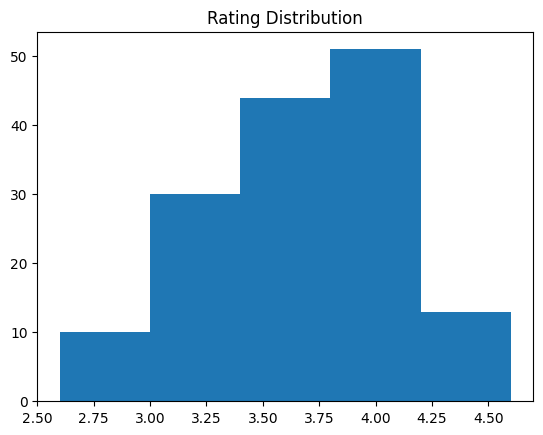

In [42]:
plt.hist(df["rate"], bins=5)
plt.title("Rating Distribution")
plt.show()

In [ ]:
# Average rating of the restaurants is 3.50-4.50

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

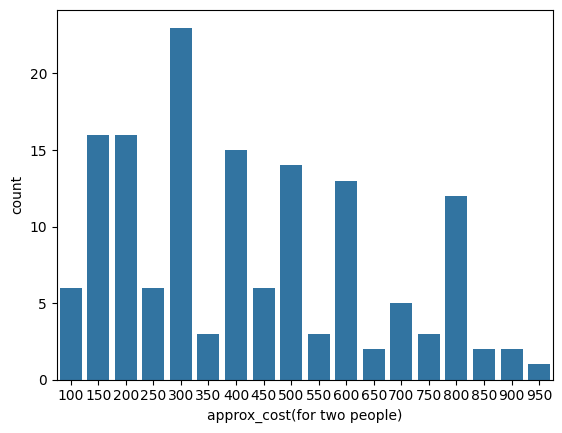

In [53]:
couple_data=df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

In [55]:
# Mostly the majority of couples prefer restaurants with an approximate cost of 300 rupees.

Text(0.5, 0, 'online order')

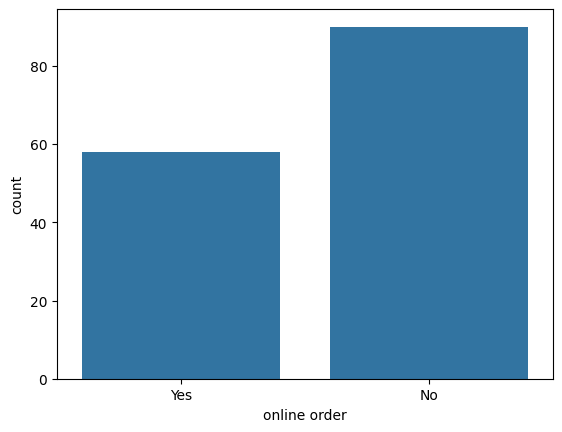

In [58]:
sns.countplot(x=df["online_order"])
plt.xlabel("online order")
# majority of the people ordered offline

In [60]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


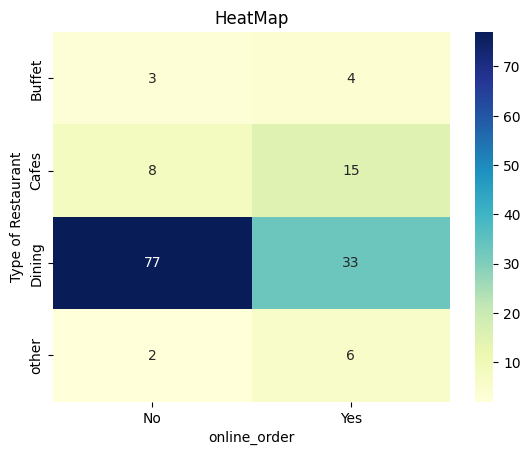

In [66]:
pivot_table=df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("HeatMap")
plt.xlabel("online_order")
plt.ylabel("Type of Restaurant")
plt.show()

# Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
# This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

In [70]:
# Zomato Analysis using the numpy, pandas, matplotlib, and seaborn libraries